# Random Forest Model interpretation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
set_plot_sizes(12,14,16)

In [4]:
#PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [5]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [6]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [7]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence based on tree variance

In [8]:
set_rf_samples(50000)

In [9]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20590726650966035, 0.24887916241978003, 0.9113909311994322, 0.8893821923088154, 0.8943892291129416]


In [10]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.23 s, sys: 19.9 ms, total: 1.25 s
Wall time: 1.25 s


(9.278122277598555, 0.3771371002425803)

In [11]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 121 ms, sys: 57.2 ms, total: 179 ms
Wall time: 339 ms


(9.278122277598555, 0.3771371002425803)

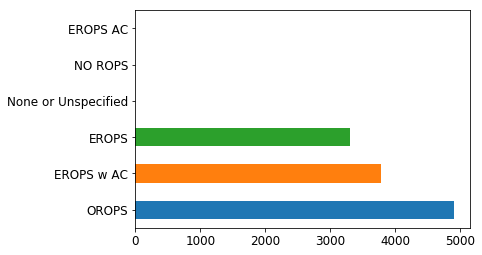

In [12]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [13]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837144,0.285258
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.574168,0.269487
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.687014,0.225288


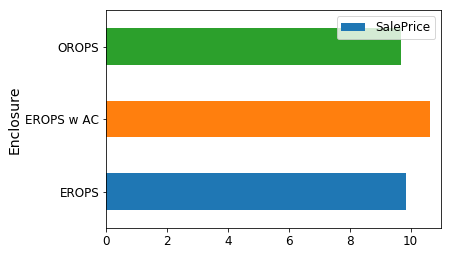

In [14]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

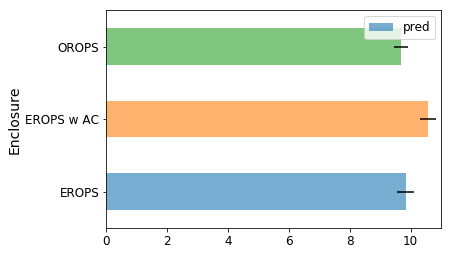

In [15]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

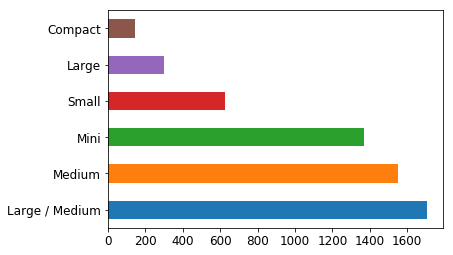

In [16]:
raw_valid.ProductSize.value_counts().plot.barh();

In [17]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.861595,0.347791
Large,10.470589,10.381359,0.381221
Large / Medium,10.691871,10.649986,0.306562
Medium,10.681511,10.617143,0.291734
Mini,9.535147,9.564731,0.257229
Small,10.324448,10.320129,0.313802


In [18]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.036722
Compact           0.035267
Small             0.030407
Large / Medium    0.028785
Medium            0.027478
Mini              0.026893
dtype: float64

# Feature importance

In [19]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.169402
37,Coupler_System,0.115488
13,ProductSize,0.093157
14,fiProductClassDesc,0.087304
2,ModelID,0.056043
38,Grouser_Tracks,0.054240
63,saleElapsed,0.050916
10,fiSecondaryDesc,0.047221
19,Enclosure,0.036021
8,fiModelDesc,0.032073


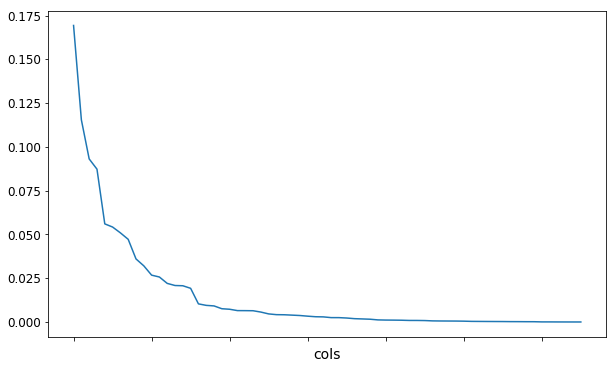

In [20]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [21]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

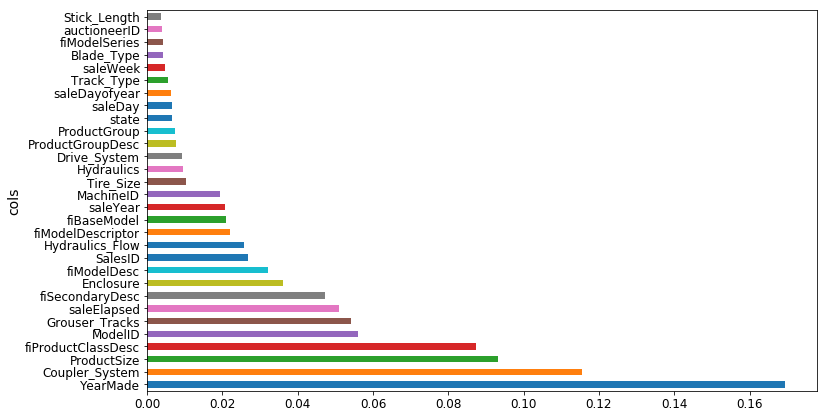

In [22]:
plot_fi(fi[:30]);

In [23]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

25

In [24]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [25]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2072831494818757, 0.24556704978994642, 0.9102027940875479, 0.8923068303523668, 0.8938898664891793]


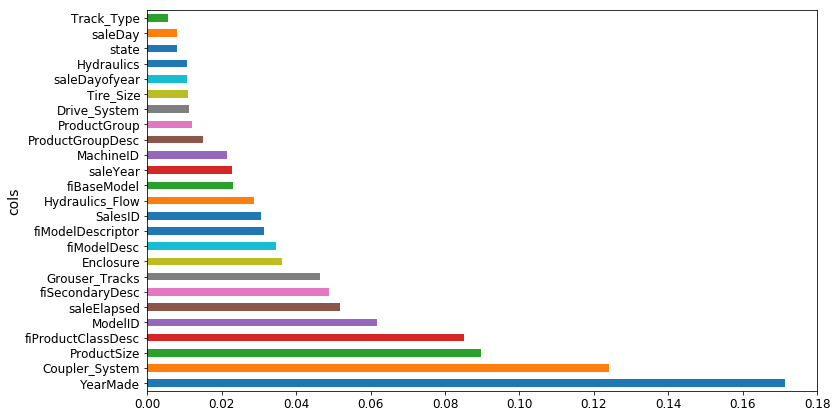

In [26]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

## One-hot encoding

In [27]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2070622896259352, 0.25520459056585787, 0.9103940496933309, 0.8836878889415387, 0.8926842568671015]


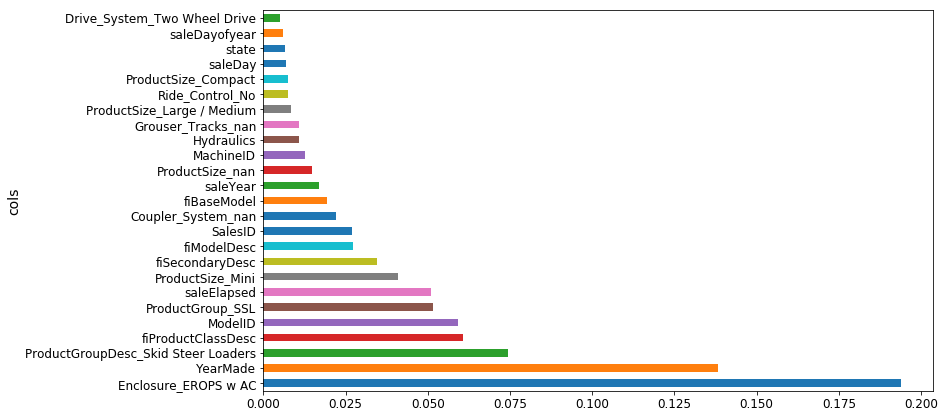

In [28]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

# Removing redundant features

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

In [29]:
from scipy.cluster import hierarchy as hc

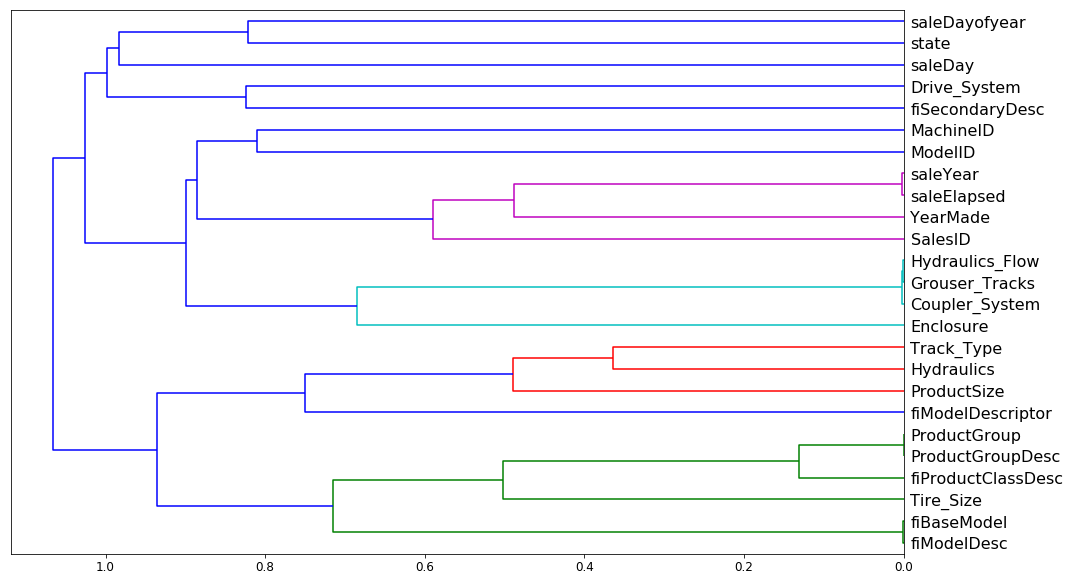

In [30]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [31]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [32]:
get_oob(df_keep)

0.8895965750858021

In [33]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8902086642414779
saleElapsed 0.887365932143209
fiModelDesc 0.8886635341944797
fiBaseModel 0.8890429449055013
Grouser_Tracks 0.8903657975933458
Coupler_System 0.8897258107293569


In [34]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8887179521950483

In [35]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [36]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [37]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [38]:
reset_rf_samples()

In [39]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12497618197882727, 0.2278846228089459, 0.9673570551133303, 0.9072576672090171, 0.9086947317994114]


# Partial dependence

In [41]:
!pip install --user pdpbox
from pdpbox import pdp
from plotnine import *

     |████████████████████████████████| 57.7MB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 286kB 95.1MB/s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=2797c7223ff7cb881187072241f5ca78ebd6879047f348e691ccdc84e65dea1a
  Stored in directory: /home/jupyter-mouguntu/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [42]:
set_rf_samples(50000)

In [43]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

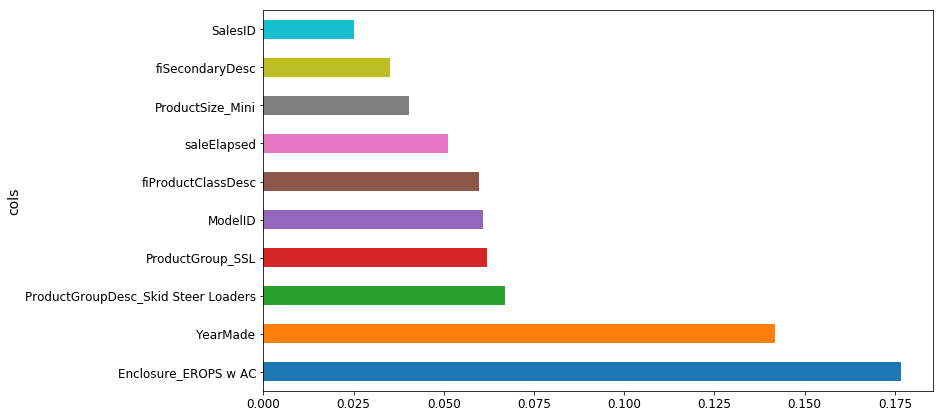

In [44]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

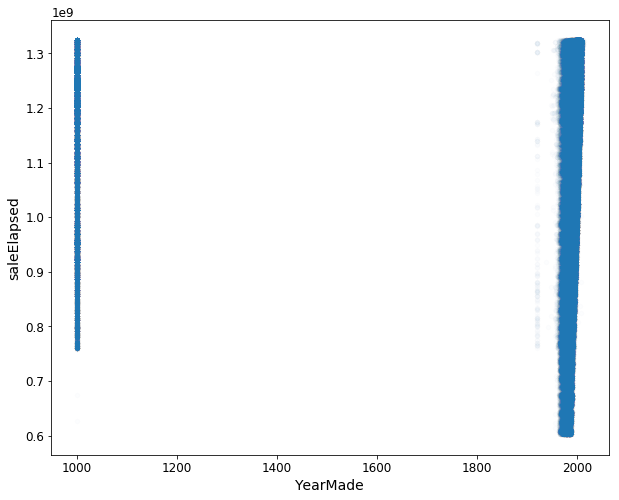

In [45]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [46]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

     |████████████████████████████████| 9.2MB 6.9MB/s eta 0:00:01


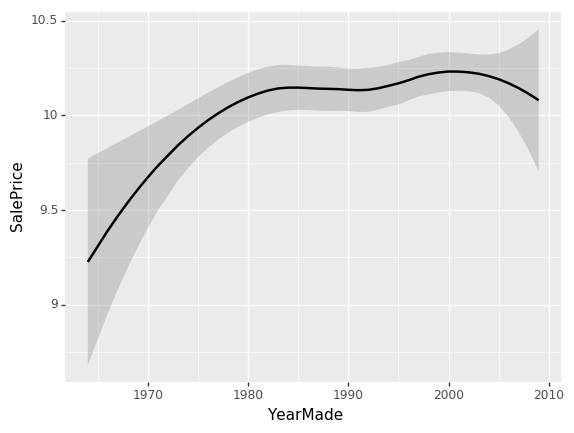

<ggplot: (-9223363290725951537)>

In [48]:
!pip install --user scikit-misc
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [49]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [50]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [51]:
plot_pdp('YearMade')

TypeError: pdp_isolate() missing 1 required positional argument: 'feature'

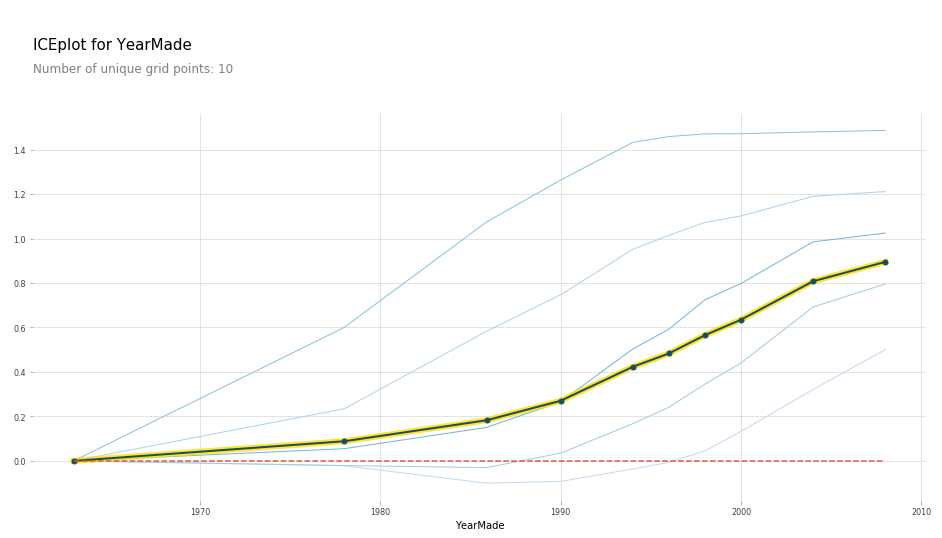

In [ ]:
plot_pdp('YearMade', clusters=5)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

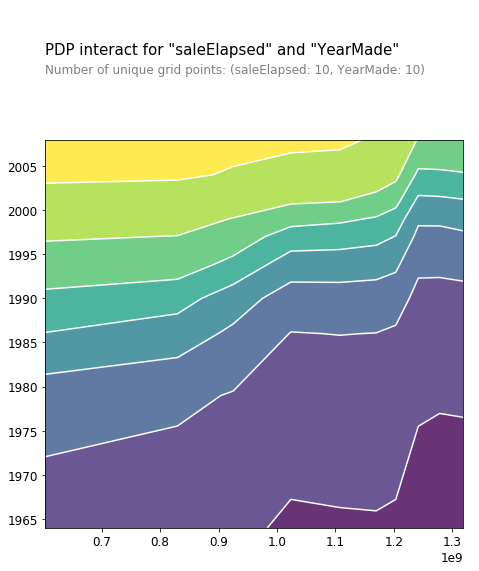

In [57]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x,x.columns, feats)
pdp.pdp_interact_plot(p, feats)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f45db56ac50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f45de746c50>})

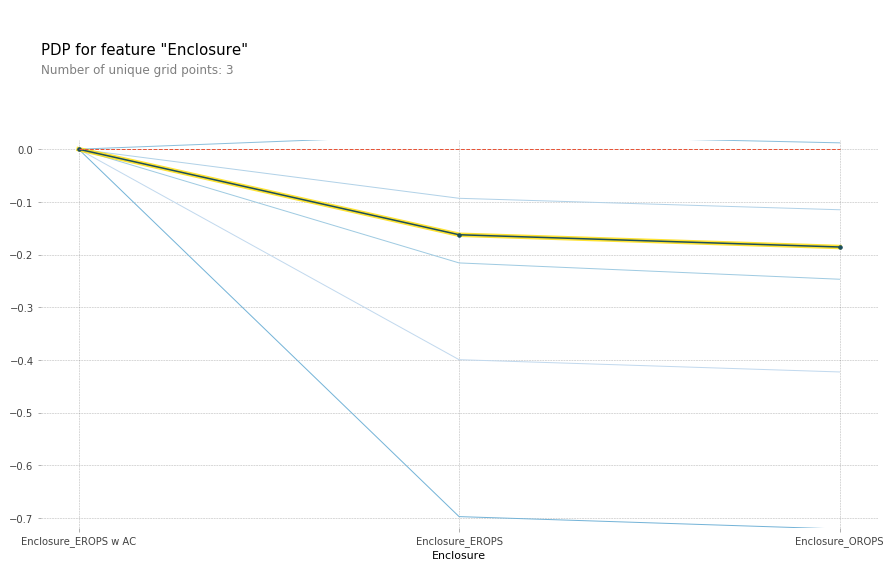

In [58]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [59]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

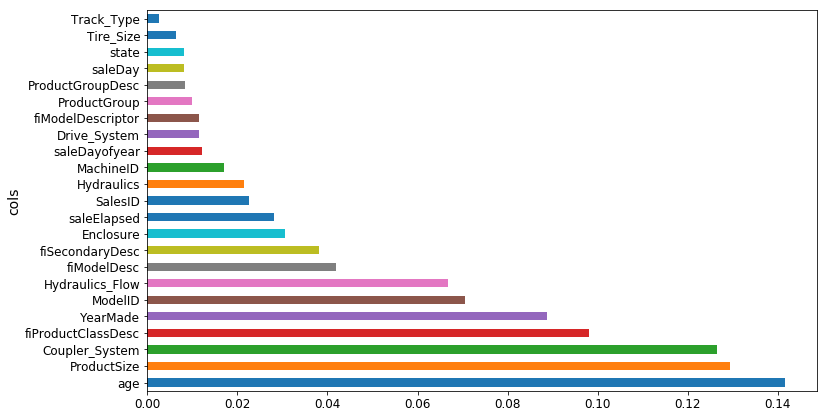

In [60]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

# Tree interpreter

In [62]:
!pip install --user treeinterpreter
from treeinterpreter import treeinterpreter as ti

In [63]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [64]:
row = X_valid.values[None,0]; row

array([[      1999,          0,          5,         17,        665, 1284595200,          0,          1,
              3232,    4364751,          0,          0,    2300944,          0,         12,          0,
                 4,          4,         35,         16,        259,          2,         11]])

In [65]:
prediction, bias, contributions = ti.predict(m, row)

In [66]:
prediction[0], bias[0]

(array([9.32643]), 10.105693654680962)

In [67]:
idxs = np.argsort(contributions[0])

In [68]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.5951811022309661),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.17843432475339158),
 ('age', 11, -0.10647542969716665),
 ('fiModelDesc', 'KX1212', -0.04810522014393017),
 ('Enclosure', 'EROPS', -0.034439348146717785),
 ('fiSecondaryDesc', nan, -0.01676172526427533),
 ('fiModelDescriptor', nan, -0.01657779151990013),
 ('MachineID', 2300944, -0.015069229339086299),
 ('saleDayofyear', 259, -0.015054099728623038),
 ('Tire_Size', nan, -0.008677225544997436),
 ('SalesID', 4364751, -0.008392919524800879),
 ('ProductGroupDesc', 'Track Excavators', 0.0002905133607419952),
 ('saleDay', 16, 0.0030968948251883345),
 ('ProductGroup', 'TEX', 0.0032481449129979634),
 ('Drive_System', nan, 0.004964330975113951),
 ('Track_Type', 'Steel', 0.009616148046612727),
 ('state', 'Ohio', 0.021769530006367877),
 ('saleElapsed', 1284595200, 0.024403110588482012),
 ('Hydraulics_Flow', nan, 0.03153316850022918),
 ('ModelID', 665, 0.034820634629793

In [69]:
contributions[0].sum()

-0.7792635343670564

# Extrapolation

In [70]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [71]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999950140230601

In [72]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
9,SalesID,0.811663
5,saleElapsed,0.142963
12,MachineID,0.036511
8,fiModelDesc,0.001912
20,saleDayofyear,0.001713
0,YearMade,0.001622
4,ModelID,0.001363
1,Coupler_System,0.000734
10,Hydraulics_Flow,0.000342
22,age,0.000286


In [73]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [74]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [75]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [76]:
x.drop(feats, axis=1, inplace=True)

In [77]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9790289809909629

In [78]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
19,age,0.239559
0,YearMade,0.183164
17,saleDayofyear,0.153026
4,ModelID,0.077892
7,fiModelDesc,0.064088
16,saleDay,0.059608
15,state,0.055226
3,fiProductClassDesc,0.031050
5,fiSecondaryDesc,0.022116
6,Enclosure,0.021823


In [79]:
set_rf_samples(50000)

In [80]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [81]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20829721464889123, 0.24748250306450256, 0.9093220378848229, 0.8906202380822649, 0.8928291569082252]


In [82]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.2090949205879755, 0.24590550267953376, 0.9086261778201177, 0.892009769468535, 0.8923568626820586]
saleElapsed
[0.21426322572473847, 0.2554714637921498, 0.9040532863577406, 0.8834445013270007, 0.886884113191649]
MachineID
[0.206611016078982, 0.24551707586684104, 0.9107842002217138, 0.8923506579144849, 0.8950272319810838]
age
[0.20903310650169477, 0.24872564398712327, 0.9086801949567728, 0.8895186170279683, 0.8919615653962759]
YearMade
[0.20896896404989654, 0.25095031687189195, 0.9087362298844348, 0.8875334246835479, 0.8921065480941223]
saleDayofyear
[0.20858542573043135, 0.2450983043901274, 0.9090709306000314, 0.8927175735561264, 0.8929373241074454]


In [83]:
reset_rf_samples()

In [84]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13747915707986483, 0.21852926834242706, 0.9604989584149579, 0.9147160715048971, 0.909194003654598]


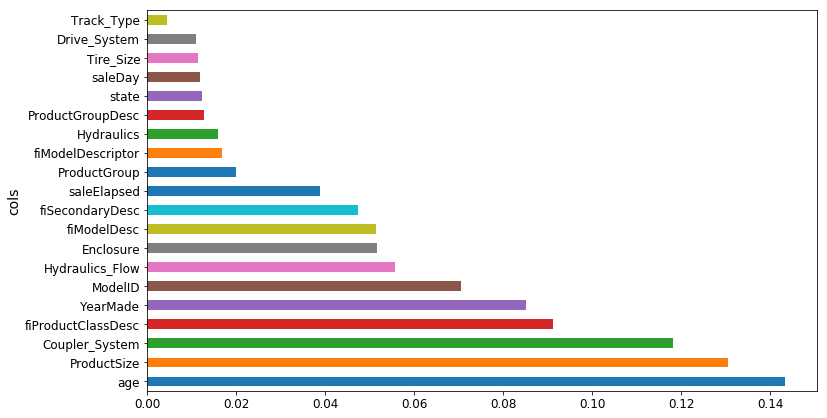

In [85]:
plot_fi(rf_feat_importance(m, X_train));

In [86]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

# final model!

In [87]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 4min 15s, sys: 1.18 s, total: 4min 16s
Wall time: 28.3 s
[0.08004199944733095, 0.21132174952892252, 0.986610305025786, 0.9202489574548248, 0.9147610857184543]
